In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import os

In [2]:
# Changing directory to data file path
os.chdir('E:/data science/Hackathons/Student Yes bank')

In [3]:
# importing yes bank training file
train=pd.read_csv('Yes_Bank_Training.csv')

In [4]:
train.head()

,serial_number,age_in_years,job_description,marital_status,education_details,has_default,balance_in_account,housing_status,previous_loan,phone_type,date,month_of_year,call_duration,campaign_contacts,days_passed,previous_contact,poutcome_of_campaign,outcome
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# missing value check for each variable
train.isnull().sum()

serial_number           0
age_in_years            0
job_description         0
marital_status          0
education_details       0
has_default             0
balance_in_account      0
housing_status          0
previous_loan           0
phone_type              0
date                    0
month_of_year           0
call_duration           0
campaign_contacts       0
days_passed             0
previous_contact        0
poutcome_of_campaign    0
outcome                 0
dtype: int64

In [6]:
# target variable encoding & dropping traget variable
train['outcome_bin']=[1 if x=='yes' else 0 for x in train['outcome']]
train=train.drop(['outcome'],axis=1)

In [7]:
# Since the number of positive class is very low we can say that the data is imbalaced
np.mean(train['outcome_bin'])

0.058137697873550505

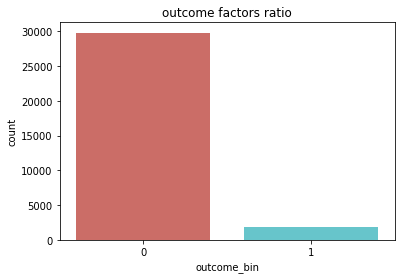

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='outcome_bin',data=train,palette='hls')
plt.title('outcome factors ratio')
plt.show()

In [10]:
# Reducing factors of categorical variables by clubbing several factors
# factors reduction for variable 'job description' based on target variable 'outcome'
train.groupby('job_description').agg({'outcome_bin':np.mean})

,outcome_bin
job_description,
admin.,0.059332
blue-collar,0.048791
entrepreneur,0.058621
housemaid,0.038184
management,0.064877
retired,0.080357
self-employed,0.064433
services,0.048567
student,0.107744


In [11]:
train['job_description']=['admin_tech_entrepre_unk' if (x=='admin.')|(x=='technician')|(x=='entrepreneur')|(x=='unknown') else x for x in train['job_description']]

In [12]:
train['job_description']=['blue_service' if (x=='blue-collar')|(x=='services') else x for x in train['job_description']]

In [13]:
train['job_description']=['manage_self' if (x=='management')|(x=='self-employed') else x for x in train['job_description']]

In [14]:
# factors reduction for variable 'education_details' based on target variable 'outcome'
train.groupby('education_details').agg({'outcome_bin':np.mean})

,outcome_bin
education_details,
primary,0.048021
secondary,0.054775
tertiary,0.071562
unknown,0.044811


In [15]:
train['education_details']=['primary' if x=='unknown' else x for x in train['education_details']]

In [16]:
# variable encoding for 'has_default' 
train['has_default'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
train['has_default']=[1 if x=='yes' else 0 for x in train['has_default']]

In [18]:
# variable encoding for 'housing_status'
train['housing_status'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
train['housing_status']=[1 if x=='yes' else 0 for x in train['housing_status']]

In [20]:
# variable encoding for 'previous_loan'
train['previous_loan'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
train['previous_loan']=[1 if x=='yes' else 0 for x in train['previous_loan']]

In [22]:
# factors reduction for variable 'month_of_year' based on target variable 'outcome'
train['month_of_year'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [23]:
train.groupby('month_of_year').agg({'outcome_bin':np.mean})

,outcome_bin
month_of_year,
apr,0.110526
aug,0.055225
dec,0.076923
feb,0.111063
jan,0.032313
jul,0.060188
jun,0.044806
mar,0.484496
may,0.032424


In [24]:
train['month_of_year']=['apr_feb' if (x=='apr')|(x=='feb') else x for x in train['month_of_year']]

In [25]:
train['month_of_year']=['jul_nov' if (x=='jul')|(x=='nov') else x for x in train['month_of_year']]

In [26]:
train['month_of_year']=['jan_may' if (x=='jan')|(x=='may') else x for x in train['month_of_year']]

In [27]:
# factors reduction for variable 'poutcome_of_campaign' based on target variable 'outcome'
train.groupby('poutcome_of_campaign').agg({'outcome_bin':np.mean})

,outcome_bin
poutcome_of_campaign,
failure,0.038221
other,0.052045
success,0.185185
unknown,0.058869


In [28]:
train['poutcome_of_campaign']=['other_unk' if (x=='other')|(x=='unknown') else x for x in train['poutcome_of_campaign']]

In [29]:
# dropping serial number from train data
train1=train.drop(['serial_number'],axis=1)

In [30]:
# importing test data file 
test=pd.read_csv('Yes_Bank_Test.csv')

In [31]:
# factors reduction for all variables of test data based on train data
# variable encoding for all variables based on the train data

test['job_description']=['admin_tech_entrepre_unk' if (x=='admin.')|(x=='technician')|(x=='entrepreneur')|(x=='unknown') else x for x in test['job_description']]

test['job_description']=['blue_service' if (x=='blue-collar')|(x=='services') else x for x in test['job_description']]

test['job_description']=['manage_self' if (x=='management')|(x=='self-employed') else x for x in test['job_description']]



test['education_details'].unique()

test['education_details']=['primary' if x=='unknown' else x for x in test['education_details']]

test['has_default'].unique()

test['has_default']=[1 if x=='yes' else 0 for x in test['has_default']]

test['housing_status'].unique()

test['housing_status']=[1 if x=='yes' else 0 for x in test['housing_status']]

test['previous_loan'].unique()

test['previous_loan']=[1 if x=='yes' else 0 for x in test['previous_loan']]

test['phone_type'].unique()

test['date'].unique()

test['month_of_year'].unique()

test['month_of_year']=['apr_feb' if (x=='apr')|(x=='feb') else x for x in test['month_of_year']]

test['month_of_year']=['jul_nov' if (x=='jul')|(x=='nov') else x for x in test['month_of_year']]

test['month_of_year']=['jan_may' if (x=='jan')|(x=='may') else x for x in test['month_of_year']]


test['poutcome_of_campaign'].unique()

test['poutcome_of_campaign']=['other_unk' if (x=='other')|(x=='unknown') else x for x in test['poutcome_of_campaign']]

test1=test.drop(['serial_number'],axis=1)


In [32]:
# since the train and test data has different number of classes 
# creating dummies by concating test and train data and separationg test train after dummies creation 
train1['label']='train'
# Concat
concat_df = pd.concat([train1 , test1])

# Creating dummies
concat_df = pd.get_dummies(concat_df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [33]:
# Spliting test and train data
train1 = concat_df[concat_df['label_train'] == 1]
test1= concat_df[concat_df['label_train'] == 0]

# Dropping label variable from both data sets
train1 = train1.drop('label_train', axis=1)
test1 = test1.drop('label_train', axis=1)

In [34]:
# since we are creating dummies by concating so an extra target variable with all NaN's is created in test data
# dropping variable outcome from test
test1=test1.drop(['outcome_bin'],axis=1)

In [35]:
# creating X Y datasets for train data
x=train1.drop(['outcome_bin'],axis=1)
y=train1['outcome_bin']

In [36]:
# since data is imbalaced we should use oversamling
# applying smote transformation for X & Y
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_sample(x,y)

In [37]:
# spliting data into test and train
import sklearn.model_selection as ms
x_train,x_test,y_train,y_test=ms.train_test_split(x,y,test_size=0.2,random_state=200)

In [38]:
# Using random forest classifier building model on x_train & y_train 
import sklearn.ensemble as ensemble

In [39]:
clf=ensemble.RandomForestClassifier(n_estimators=160,oob_score=True,n_jobs=-1)

In [40]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [41]:
# Predicting outcome for x_test data
y_pred=clf.predict(x_test)

In [42]:
# Accuracy check on X_test data
clf.score(x_test,y_test)

0.9720731298222073

In [43]:
# out of bag error score
clf.oob_score_

0.9737912525684572

In [44]:
# Predicting outcome for test data
test_pred=clf.predict(test1)

In [45]:
# Output file for test data
submission=pd.DataFrame()

In [46]:
outcome=['yes' if x==1 else 'no' for x in test_pred]

In [47]:
submission['serial_number']=test['serial_number']

In [48]:
submission['outcome']=outcome

In [49]:
submission.to_csv('submussion.csv',index=False)